<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
#((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,47,109,109,109,110,109,109,191,255,253,253,253,255,211,31,0,0,0,0,0,0
8,0,0,0,0,63,217,217,232,252,252,252,253,252,252,252,253,252,252,252,253,252,195,0,0,0,0,0,0
9,0,0,0,0,176,252,252,252,252,252,252,253,252,252,252,253,252,252,252,253,252,215,0,0,0,0,0,0


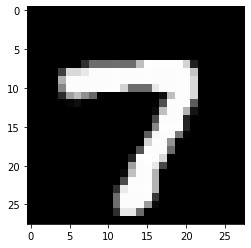

In [4]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])